<a href="https://colab.research.google.com/github/luisahamon/Hipertens-o/blob/main/Hipertens%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
dados = pd.read_csv('hypertension_data.csv')
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [4]:
dados.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

Há 25 registros nulos na entrada referente ao gênero, como não é uma quantidade relevante de dados vou eliminar esses registros

In [5]:
dados = dados.dropna().reset_index(drop=True)

In [6]:
dados.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Renomear a colunas para facilitar o trabalho e a interpretação dos resultados

In [7]:
dados.rename(columns={
    'age': 'idade',
    'sex': 'gênero',
    'cp' : 'tipo_dor',
    'trestbps' : 'Pressão_arterial_em_repouso',
    'chol' : 'colesterol_serico',
    'fbs' : 'açucar > 120 mg/dl',
    'restecg' : 'Resultados_ECG',
    'thalach' : 'FC_máxima',
    'exang' : 'angina_por_exercicio',
    'oldpeak' : 'Depressão_do_segmento_ST_pelo_exercício',
    'slope' : 'inclinação_do_ST_do_exercício_de_pico',
    'ca' : 'N_vasos_principais',
    'target' : 'hipertensao'
}, inplace=True)

In [8]:
dados

,idade,gênero,tipo_dor,Pressão_arterial_em_repouso,colesterol_serico,açucar > 120 mg/dl,Resultados_ECG,FC_máxima,angina_por_exercicio,Depressão_do_segmento_ST_pelo_exercício,inclinação_do_ST_do_exercício_de_pico,N_vasos_principais,thal,hipertensao
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26054,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26055,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26056,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [9]:
dados['hipertensao'] = dados['hipertensao'].astype('float')

In [10]:
dados.dtypes

idade                                      float64
gênero                                     float64
tipo_dor                                     int64
Pressão_arterial_em_repouso                  int64
colesterol_serico                            int64
açucar > 120 mg/dl                           int64
Resultados_ECG                               int64
FC_máxima                                    int64
angina_por_exercicio                         int64
Depressão_do_segmento_ST_pelo_exercício    float64
inclinação_do_ST_do_exercício_de_pico        int64
N_vasos_principais                           int64
thal                                         int64
hipertensao                                float64
dtype: object

Verificando o % de individuos com pressão alta no dataset

In [12]:
pressao_alta = []
for i in range(len(dados)):
  if dados['hipertensao'][i] == 1:
      pressao_alta.append(dados['hipertensao'][i])
len(pressao_alta)

14274

In [14]:
perc = len(pressao_alta) / len(dados['idade']) 
perc

0.5477780336173153

Aproximadamente 54,7% dos indivíduos analisados apresentavam hipertensão

#Estudo de Variáveis

**Idade**

(array([  60.,  748., 2660., 3803., 5032., 5095., 4176., 3352., 1047.,
          85.]),
 array([11. , 19.7, 28.4, 37.1, 45.8, 54.5, 63.2, 71.9, 80.6, 89.3, 98. ]),
 <a list of 10 Patch objects>)

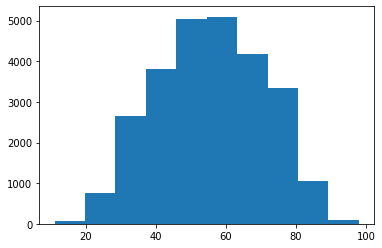

In [17]:
import matplotlib.pyplot as plt
plt.hist(dados['idade'])

In [19]:
dados['idade'].describe()

count    26058.000000
mean        55.655730
std         15.190407
min         11.000000
25%         44.000000
50%         56.000000
75%         67.000000
max         98.000000
Name: idade, dtype: float64

Pela analise do gráfico vemos que a distribuição das idades aparenta ser uma distribuição normal e na tabela infere-se que:

A idade mínima dessa análise é 11 anos

A média é 55 anos

A idade máxima é 98 anos

**Frequência cardiaca Máxima** 

(array([  82.,  514.,  952., 2240., 3000., 4546., 6692., 5334., 2238.,
         460.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

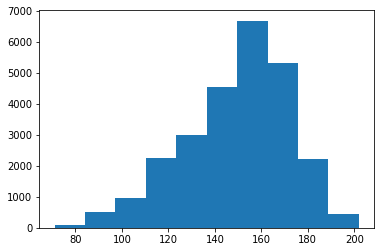

In [33]:
plt.hist(dados['FC_máxima'])

In [35]:
dados['FC_máxima'].describe()

count    26058.000000
mean       149.643181
std         22.865871
min         71.000000
25%        133.000000
50%        153.000000
75%        166.000000
max        202.000000
Name: FC_máxima, dtype: float64

Considerando recomendações médicas a frequência cardiaca máxima não deve ultrapassar 210 - idade, temos uma médi FC_máxima de aproximadamente 150 e a média das idades é 55 anos, ou seja possivelmente há na base de dados muitas pessoas que fogem dessa recomendação

**Testando Frequência cardíaca máxima**

In [43]:
limite = []
alta = []
for i in range(len(dados)):
  limite.append(210 - dados.idade[i])
  if limite[i] < dados.FC_máxima[i]:
    alta.append(dados.FC_máxima[i])
len(alta)

11723

In [44]:
perc = 11723/26058
perc

0.44988103461508944

Com base nas idades e frequências cardíacas existem 11723 pessoas que estavam com os batimesnto acima do limite para sua idade, ou seja, 44.98% dos individuos

**Açucar no Sangue**

(array([22152.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

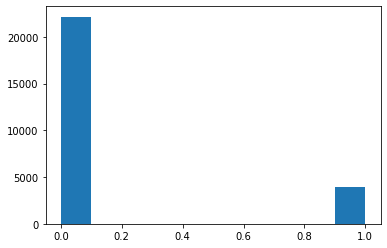

In [32]:
plt.hist(dados['açucar > 120 mg/dl'])

Com esse gráfico vê-se que não há grande prevalencia de açucar alto no sangue entre os inidivíduos pesquisados